## MOFAtalk

In [1]:
data_dir = "/home/dbdimitrov/Repos/liana2_manuscript/data/kidney_injury/"

In [ ]:
# columns of interest
sample_key = "ident"
groupby = "cell_type"
condition_key = "Group"

## Setup Environment

In [2]:
import numpy as np
import pandas as pd

import scanpy as sc

In [3]:
import mofax as mofa
import muon as mu
import decoupler as dc

/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import liana as li
import plotnine as p9

In [6]:
li.__version__

'0.1.9'

Load object

In [7]:
adata = sc.read_h5ad(data_dir + "aki_processed.h5ad")

## Run LIANA

In [9]:
li.method.rank_aggregate.by_sample(adata,
                                   groupby=groupby,
                                   sample_key=sample_key,
                                   resource_name='mouseconsensus',
                                   use_raw=False,
                                   verbose=True,
                                   n_perms=None,
                                   return_all_lrs=False
                                   )

Now running: IRIsham3: 100%|██████████| 24/24 [06:38<00:00, 16.60s/it]


## Run MOFA

In [44]:
score_key = 'lr_probs'

In [45]:
mdata = li.multi.lrs_to_views(adata,
                              sample_key=sample_key,
                              score_key=score_key,
                              obs_keys=[condition_key], # add those to mdata.obs
                              lr_prop = 0.2, # minimum required proportion of samples to keep an LR
                              lrs_per_sample = 20, # minimum number of interactions to keep a sample in a specific view
                              lrs_per_view = 20, # minimum number of interactions to keep a view
                              samples_per_view = 5, # minimum number of samples to keep a view
                              min_variance = 0, # minimum variance to keep an interaction
                              lr_fill = 0.5, # fill missing LR values across samples with this
                              verbose=True
                              )

100%|██████████| 123/123 [00:00<00:00, 303.90it/s]


In [46]:
mu.tl.mofa(mdata,
           use_obs='union',
           convergence_mode='medium',
           outfile='models/mofatalk.h5ad',
           n_factors=4,
           )


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='PEC&MTAL' group='group1' with N=23 samples and D=36 features...
Loaded view='PEC&PC' group='group1' with N=23 samples and D=37 features...
Loaded view='PEC&PT' group='group1' with N=23 samples and D=46 features...
Loaded view='PEC&Uro' group='group1' with N=23 samples and D=87 features...
Loaded view='PEC&DTL-ATL' group='group1' with N=23 samples and D=55 features..

In [47]:
# obtain factor scores
factor_scores = li.multi.get_factor_scores(mdata, obsm_key='X_mofa')
factor_scores.head()

,ident,Factor_1,Factor_2,Factor_3,Factor_4,Group
0,IRI12h1b2,0.224744,0.058671,0.026097,-0.013797,12hours
1,IRI12h2,0.223746,0.058012,0.025650,-0.012489,12hours
2,IRI14d1b1,-0.097588,-0.060265,0.031073,0.116802,14days
3,IRI14d1b2,-0.101265,-0.060860,0.028593,0.115854,14days
4,IRI2d1b2,-0.103062,0.107352,0.028951,-0.013804,2days


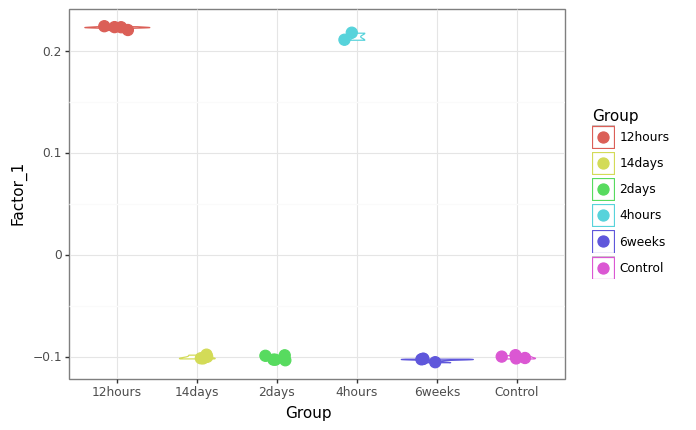

<ggplot: (8762180133895)>

In [48]:
# scatterplot
(p9.ggplot(factor_scores) +
 p9.aes(x='Group', colour='Group', y='Factor_1') +
 p9.geom_violin() +
 p9.geom_jitter(size=4, width=0.2) +
 p9.theme_bw()
 )

In [49]:
model = mofa.mofa_model("models/mofatalk.h5ad")
model

MOFA+ model: mofatalk.h5ad
Samples (cells): 23
Features: 3000
Groups: group1 (23)
Views: CNT&DTL-ATL (25), CNT&Fib (44), CNT&PEC (40), CNT&Pod (33), CNT&Uro (49), CTAL&Fib (42), CTAL&Uro (42), DCT&Fib (41), DCT&PEC (29), DCT&Uro (42), DCT-CNT&Uro (43), DTL-ATL&DTL-ATL (28), DTL-ATL&Fib (39), DTL-ATL&PEC (41), DTL-ATL&Uro (65), EC&Uro (40), Fib&DTL-ATL (54), Fib&Fib (79), Fib&MTAL (40), Fib&PC (18), Fib&PEC (61), Fib&PT (49), Fib&Per (41), Fib&Pod (55), Fib&Uro (92), ICA&Fib (30), ICA&Uro (34), ICB&Fib (36), ICB&Uro (38), MTAL&Fib (44), MTAL&Uro (35), PC&DTL-ATL (38), PC&Fib (53), PC&PEC (48), PC&PT (32), PC&Per (23), PC&Pod (41), PC&Uro (67), PEC&DTL-ATL (55), PEC&EC (37), PEC&Fib (75), PEC&MTAL (36), PEC&PC (37), PEC&PEC (66), PEC&PT (46), PEC&Per (50), PEC&Pod (60), PEC&Uro (87), PT&Fib (31), PT&PT (23), PT&Uro (48), Per&Uro (27), Pod&DTL-ATL (25), Pod&Fib (40), Pod&PEC (38), Pod&Pod (41), Pod&Uro (45), Uro&CTAL (34), Uro&DTL-ATL (45), Uro&EC (28), Uro&Fib (49), Uro&MTAL (43), Uro&PC

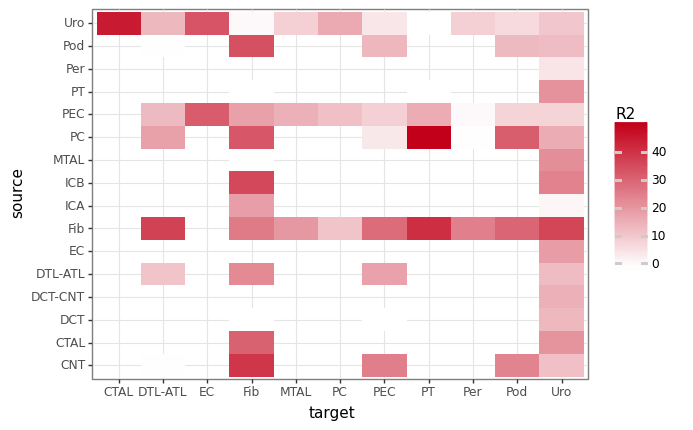

<ggplot: (8762173012731)>

In [50]:
# get variance explained by view and factor
rsq = model.get_r2()
factor1_rsq = rsq[rsq['Factor']=='Factor1']
# separate view column
factor1_rsq[['source', 'target']] = factor1_rsq['View'].str.split('&', 1, expand=True)

(p9.ggplot(factor1_rsq.reset_index()) +
 p9.aes(x='target', y='source') +
 p9.geom_tile(p9.aes(fill='R2')) +
 p9.scale_fill_gradient2(low='white', high='#c20019') +
 p9.theme_bw()
 )

In [51]:
# load PROGENy pathways
net = dc.get_progeny(organism='Mus musculus', top=5000)
# load full list of ligand-receptor pairs
lr_pairs = li.resource.select_resource('mouseconsensus')

# generate ligand-receptor geneset
lr_progeny = li.fun.generate_lr_geneset(lr_pairs, net, lr_separator="^")
lr_progeny.head()

,source,interaction,weight
1,EGFR,Dll1^Notch1,-1.000584
31,EGFR,Adam10^Notch1,-0.924934
37,MAPK,Adam10^Notch1,-0.925038
58,WNT,Tnf^Notch1,-1.513049
98,WNT,Adam17^Notch1,-0.951469


In [52]:
lr_loadings =  li.multi.get_variable_loadings(mdata,
                                              0, # get loadings for factor 1
                                              view_separator=':',
                                              )
lr_loadings.set_index('variable', inplace=True)

In [53]:
lr_loadings[lr_loadings['view'].str.contains('PT')].sort_values('loadings', ascending=False)

,loadings,view
variable,,
Col4a5^Itgav_Itgb8,1.533069,PC&PT
Slit2^App,1.533069,PC&PT
Col4a4^Itgav_Itgb8,1.533069,PC&PT
Col4a3^Itgav_Itgb8,1.533069,PC&PT
L1cam^Egfr,1.533069,PC&PT
...,...,...
Adam12^Sdc4,-1.377403,Fib&PT
Tgm2^Itgb1,-1.503532,Fib&PT
Serpine1^Plaur,-1.503532,Fib&PT


In [54]:
# pivot views to wide
lr_loadings = lr_loadings.pivot(columns='view', values='loadings')
# replace NaN with 0
lr_loadings.replace(np.nan, 0, inplace=True)
lr_loadings.head()

view,CNT&DTL-ATL,CNT&Fib,CNT&PEC,CNT&Pod,CNT&Uro,CTAL&Fib,CTAL&Uro,DCT&Fib,DCT&PEC,DCT&Uro,...,Uro&DTL-ATL,Uro&EC,Uro&Fib,Uro&MTAL,Uro&PC,Uro&PEC,Uro&PT,Uro&Per,Uro&Pod,Uro&Uro
variable,,,,,,,,,,,,,,,,,,,,,
Actr2^Lrp2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-0.002033,0.000000,0.000000,0.000000
Adam10^Axl,0.000000,-1.162802,-1.519402,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,-0.026940,0.000000,0.000000,-0.399846,0.000000,-0.029697,-0.135674,0.000000
Adam10^Cadm1,-0.000445,0.000000,-1.186858,0.000000,-1.300067,0.0,0.0,0.0,0.0,0.0,...,-0.086366,0.0,0.000000,-0.337696,-0.880869,-0.064860,0.000000,0.000000,0.000000,-0.003669
Adam10^Epha3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.057432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Adam10^Il6ra,0.000000,0.000000,0.000000,-1.540413,-0.143192,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.042177,-0.088278


In [55]:
# run pathway enrichment analysis
estimate, pvals =  dc.run_mlm(lr_loadings.transpose(), lr_progeny,
                              source="source", target="interaction",
                              use_raw=False, min_n=5)
# pivot columns to long
estimate = (estimate.
            melt(ignore_index=False, value_name='estimate', var_name='pathway').
            reset_index().
            rename(columns={'index':'view'})
            )


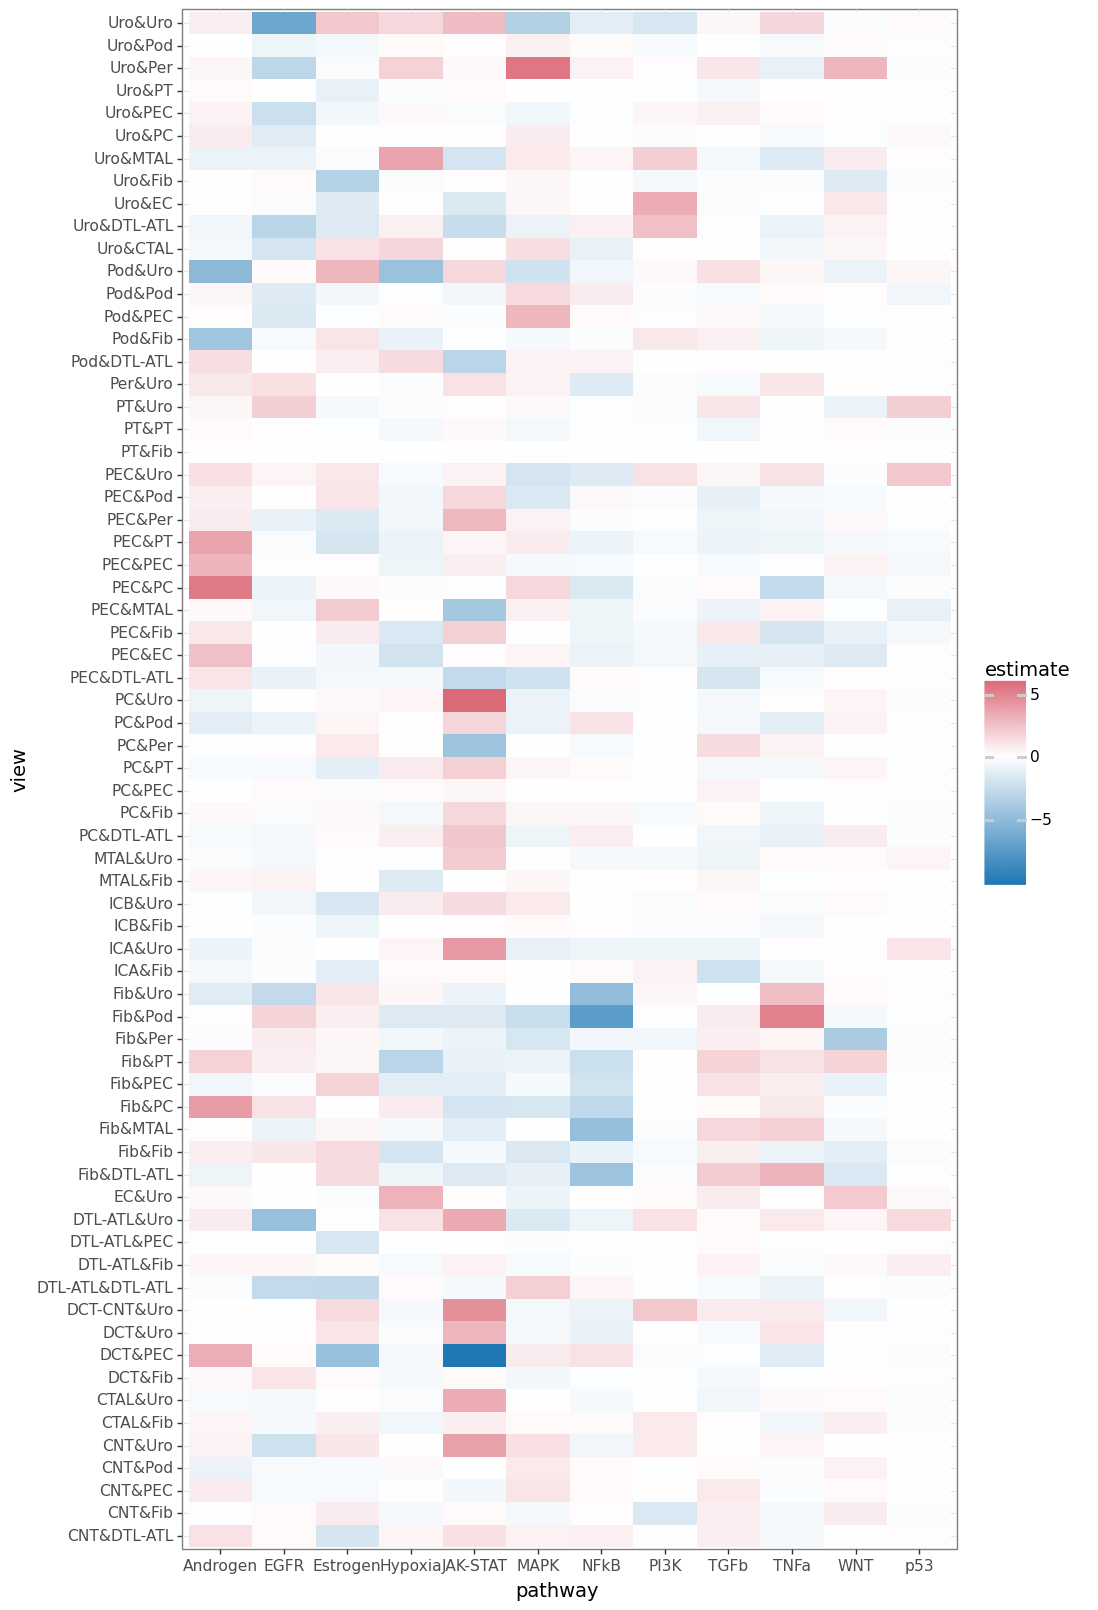

<ggplot: (8762234537948)>

In [56]:
## p9 tile plot
(p9.ggplot(estimate) +
 p9.aes(x='pathway', y='view') +
 p9.geom_tile(p9.aes(fill='estimate')) +
 p9.scale_fill_gradient2(low='#1f77b4', high='#c20019') +
 p9.theme_bw(base_size=14) +
 p9.theme(figure_size=(10, 20))
)


In [57]:
model.close()

Save the AnnData object

In [58]:
adata.write_h5ad(data_dir + "aki_processed.h5ad")

In [59]:
adata

AnnData object with n_obs × n_vars = 126048 × 24629
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Group', 'Replicates', 'cell_state', 'ident', 'cell_type', 'full_name', 'keep_sum', 'keep_min', 'keep_celltype', 'n_genes'
    var: 'n_cells'
    uns: 'X_name', 'log1p', 'liana_res'
    layers: 'counts'